Basic Imports

In [0]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Importing the MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(type(x_train))
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# y_train = y_train.reshape(y_train.shape[0],1)

# splitSz = x_train.shape[0]
# splitSz = int(1.0*splitSz)

# print(y_train.shape)
# x_train, x_test = x_train[:splitSz,:], x_train[splitSz:,:]
# y_train, y_test = y_train[:splitSz], y_train[splitSz:]

print(y_train.shape)
print(y_train[:10])
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 28, 28, 1)


### Model
1. 7x7 Convolutional Layer with 32 ﬁlters and stride of 1.
2. ReLU Activation Layer.
3. Batch Normalization Layer
4. 2x2 Max Pooling layer with a stride of 2
5. fully connected layer with 1024 output units.
6. ReLU Activation Layer.

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v1_10 (B (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              6423552   
_________________________________________________________________
dense_24 (Dense)             (None, 10)                10250     
Total params: 6,434,250
Trainable params: 6,434,186
Non-trainable params: 64
_________________________________________________________________

In [0]:
print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=10)

(60000,)
Epoch 1/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.3876 - acc: 0.9472
Epoch 2/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0368 - acc: 0.9884
Epoch 3/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0220 - acc: 0.9931
Epoch 4/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0197 - acc: 0.9937
Epoch 5/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0147 - acc: 0.9954
Epoch 6/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0127 - acc: 0.9960
Epoch 7/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0170 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0111 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0094 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================

In [0]:
score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

10000/10000 [==============================] - 1s 98us/sample - loss: 5.0916 - acc: 0.6837

 Test Acc =  0.6837


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total para

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 6,435,530
Trainable params: 6,435,466
Non-trainable params: 64
_________________________________________________________________

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              12846080  
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
Total params: 12,859,786
Trainable params: 12,859,658
Non-trainable params: 128
______________________________________________________________

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        50208     
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total para

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        50208     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              6423552   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total para

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

model.fit(x_train, y_train, batch_size=64, epochs=5)

score = model.evaluate(x_test, y_test)
print('\n', 'Test Acc = ', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        100384    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              6423552   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total para

[Link](https://www.kaggle.com/raoulma/mnist-image-class-tensorflow-cnn-99-51-test-acc)

1. input layer: [.,784]
2. layer: Conv1 -> ReLu -> MaxPool: [.,14,14,36]
3. layer: Conv2 -> ReLu -> MaxPool: [.,7,7,36]
4. layer: Conv3 -> ReLu -> MaxPool: [.,4,4,36]
5. layer: FC -> ReLu: [.,576]
6. output layer: FC -> ReLu: [.,10]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 36)        1800      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 36)        63540     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 36)          63540     
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 7, 7, 36)          144       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 3, 36)          0         
__________

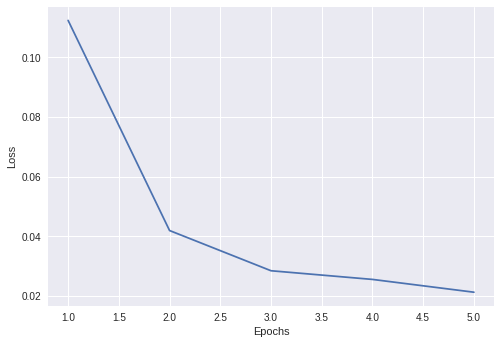

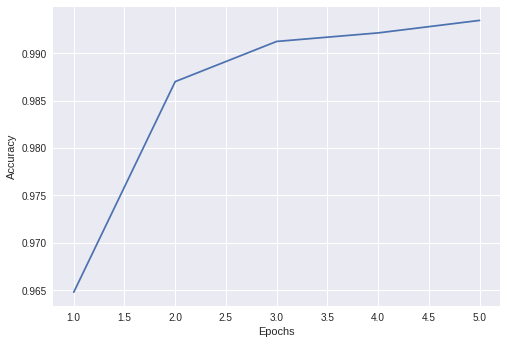

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print(y_train.shape)

num_epochs = 5
infoFit = model.fit(x_train, y_train, batch_size=64, epochs=num_epochs)

score = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
# print('\n', 'Test Acc = ', score[1])
print(score)
print('\n'," Predictions: ", pred.shape)

print(infoFit.history['loss'])
plt.plot(np.arange(1,num_epochs+1), infoFit.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig("loss_MNIST.png")

plt.figure()

plt.plot(np.arange(1,num_epochs+1), infoFit.history['acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.savefig("acc_MNIST.png")

totalTest = 10000.0
correctClassify = 0

result = pred

result

o = np.zeros(10000)


for i in range(10000):
  o[i] = np.argmax(pred[i])

from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, o)
cr = classification_report(y_test, o)
# print(matrix)
print(cr)

num = 1
for row in matrix:
  print("Class ",num, " & ")
  num+=1
  nx = 0
  for e in row:
    nx += 1
    if nx <95:
      print(e, end=" & ")
    else:
      print(e,end=" ")
  print(end="\\\\ \\hline \n")

In [0]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1024, activation="relu"))

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

print(y_train.shape)

some = model2.fit(x_train, y_train, batch_size=64, epochs=10)

score = model2.evaluate(x_test, y_test)
pred = model2.predict(x_test)
# print('\n', 'Test Acc = ', score[1])
print(score)
# print('\n'," Predictions: ", pred)
print(some)

In [0]:
print(some.history.keys())

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, pred.argmax(axis=1))
cr = classification_report(y_test, pred.argmax(axis=1))
print(matrix)
print(cr)

for row in matrix:
  for e in row:
    print(e, end=" & ")
  print(end="\n")